In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices(device_type="GPU")[0], True)
from deepsphere.healpy_layers import HealpySmoothing

os.environ["OMP_NUM_THREADS"] = str(len(os.sched_getaffinity(0)))
import healpy as hp

from msfm.utils import files, redshift, clustering, scales, input_output
from msfm.fiducial_pipeline import FiducialPipeline

In [3]:
conf = "/global/homes/a/athomsen/multiprobe-simulation-forward-model/configs/v10/linear_bias.yaml"
# conf = "/global/homes/a/athomsen/multiprobe-simulation-forward-model/configs/v10/linear_bias_octant.yaml"
conf = files.load_config(conf)
datapath = "/global/homes/a/athomsen/multiprobe-simulation-forward-model/data/healpy_data"

n_side = conf["analysis"]["n_side"]

data_vec_pix, patches_pix_dict, corresponding_pix_dict, _ = files.load_pixel_file(conf)
patch_pix = patches_pix_dict["metacal"][0][0]

24-09-24 08:06:06     files.py INF   Loaded the pixel file /global/u2/a/athomsen/multiprobe-simulation-forward-model/data/DESY3_pixels_v11_fiducial_512.h5 


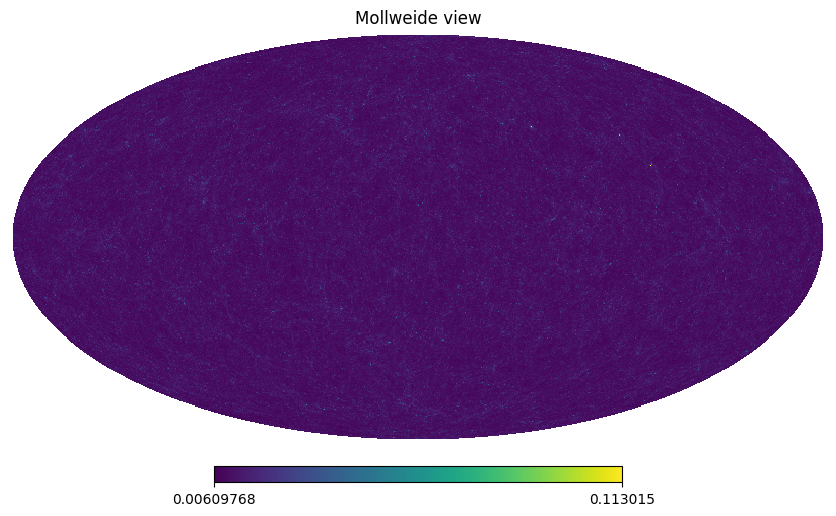

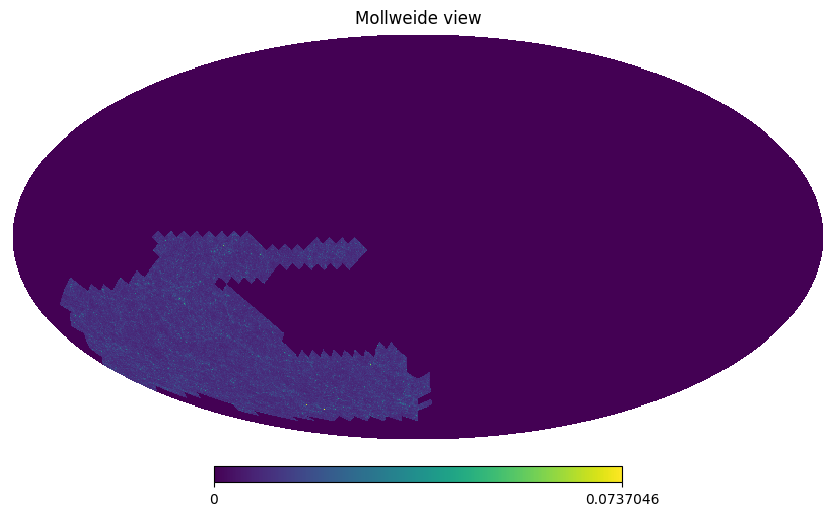

In [4]:
fidu_dir = "/global/cfs/cdirs/des/cosmogrid/v11desy3/CosmoGrid/v11desy3/fiducial/cosmo_fiducial"

with h5py.File(os.path.join(fidu_dir, f"perm_0000", "projected_probes_maps_v11dmb.h5"), "r") as f:
    kg = hp.ud_grade(f["map/kg/metacal1"][:], n_side)
    
hp.mollview(kg)

kg_masked = np.zeros_like(kg)
kg_masked[data_vec_pix] = hp.reorder(kg, r2n=True)[data_vec_pix]
kg_masked = hp.reorder(kg_masked, n2r=True)
hp.mollview(kg_masked)

[None, (100.0, 1611.75), (1e-12, 1e-09)]

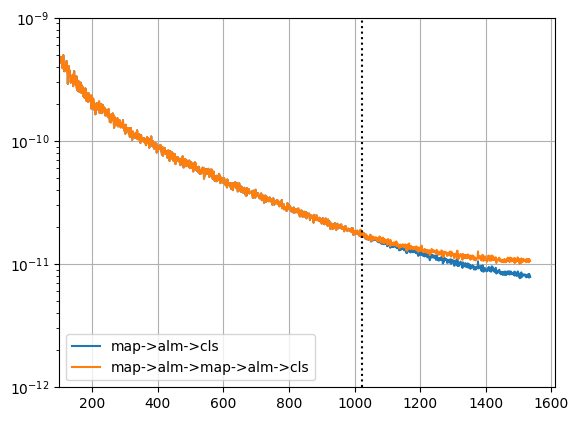

In [16]:
# map_0 = kg_masked
map_0 = kg

alm_0 = hp.map2alm(map_0, pol=False, use_pixel_weights=True, datapath=datapath)
cls_0 = hp.alm2cl(alm_0)

map_1 = hp.alm2map(alm_0, nside=n_side, pol=False)
alm_1 = hp.map2alm(map_1, pol=False, use_pixel_weights=True, datapath=datapath)
cls_1 = hp.alm2cl(alm_1)

map_2 = hp.alm2map(alm_1, nside=n_side, pol=False)
alm_2 = hp.map2alm(map_2, pol=False, use_pixel_weights=True, datapath=datapath)
cls_2 = hp.alm2cl(alm_2)


fig, ax = plt.subplots()

ax.plot(cls_0, label="map->alm->cls")
ax.plot(cls_1, label="map->alm->map->alm->cls")
# ax.plot(cls_1, label="map->alm->map->alm->map->alm->cls")
ax.axvline(2*n_side, color="k", linestyle=":")

ax.legend()
ax.grid(True)
ax.set(yscale="log", xlim=(100, None), ylim=(1e-12, 1e-9))